#**Data Loading, Storage and File Formats**

Problem Statement: Analyzing Sales Data from Multiple File Formats

Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON)

Description: The goal is to load and analyze sales data from different file formats, including CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the dataset.

Tasks to Perform:
Obtain sales data files in various formats, such as CSV, Excel, and JSON.
1. Load the sales data from each file format into the appropriate data structures or dataframes.
2. Explore the structure and content of the loaded data, identifying any inconsistencies, missing values, or data quality issues.
3. Perform data cleaning operations, such as handling missing values, removing
duplicates, or correcting inconsistencies.
4. Convert the data into a unified format, such as a common dataframe or data structure,
to enable seamless analysis.
5. Perform data transformation tasks, such as merging multiple datasets, splitting
columns, or deriving new variables.
6. Analyze the sales data by performing descriptive statistics, aggregating data by
specific variables, or calculating metrics such as total sales, average order value, or
product category distribution.
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales
data and gain insights into sales trends, customer behavior, or product performance.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
# Load Data from Multiple File Formats
# 1. CSV File
csv_df = pd.read_csv("/content/sales_data_sample.csv", encoding='latin-1')
print("CSV Data Sample:\n", csv_df.head())

CSV Data Sample:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Ab

In [5]:
# 2. Excel File
excel_df = pd.read_excel('/content/Sample - Superstore.xls')
print("\nExcel Data Sample:\n", excel_df.head())


Excel Data Sample:
    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       424

In [6]:
# 3. JSON File
json_file = 'sales.json'  # replace with your file name
with open(json_file, 'r') as f:
    json_data = json.load(f)
json_df = pd.json_normalize(json_data['sales'])  # Adjust based on the JSON structure
print("\nJSON Data Sample:\n", json_df.head())




JSON Data Sample:
   region salesperson    product  quantity  revenue
0  North        John  Product A       100   1000.0
1  South        Jane  Product B       200   2000.0
2   East         Bob  Product A       300   3000.0
3   West       Alice  Product B       400   4000.0


In [7]:
# Data Exploration
# Check for missing values
print("\nMissing Values in CSV Data:\n", csv_df.isnull().sum())
print("\nMissing Values in Excel Data:\n", excel_df.isnull().sum())
print("\nMissing Values in JSON Data:\n", json_df.isnull().sum())


Missing Values in CSV Data:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Missing Values in Excel Data:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category   

In [8]:
print("\n\n Let's check % missing values: \n\n1.CSV\n\n")
print(csv_df.isnull().sum()/len(csv_df)*100)
print("\n2. Excel\n\n")
print(excel_df.isnull().sum()/len(excel_df)*100)
print("\n3. JSON\n\n")
print(json_df.isnull().sum()/len(json_df)*100)



 Let's check % missing values: 

1.CSV


ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

2. Excel


Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country     

In [9]:
print("\n\n We have High amount of Missing values in Address Line 2 - 90%, State-52%, Postal code - 2%")
print("We should get rid of Address line 2,postal code, state  as Country, city and address Line 1 covers sufficient data.")
csv_df.drop(columns=['ADDRESSLINE2','STATE','POSTALCODE'], inplace=True)



 We have High amount of Missing values in Address Line 2 - 90%, State-52%, Postal code - 2%
We should get rid of Address line 2,postal code, state  as Country, city and address Line 1 covers sufficient data.


In [10]:
csv_df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [11]:
print(f"{csv_df.shape} CSV shape updated")
print(f"updated null percentage : {csv_df.isnull().sum()/len(csv_df)}")

(2823, 22) CSV shape updated
updated null percentage : ORDERNUMBER         0.000000
QUANTITYORDERED     0.000000
PRICEEACH           0.000000
ORDERLINENUMBER     0.000000
SALES               0.000000
ORDERDATE           0.000000
STATUS              0.000000
QTR_ID              0.000000
MONTH_ID            0.000000
YEAR_ID             0.000000
PRODUCTLINE         0.000000
MSRP                0.000000
PRODUCTCODE         0.000000
CUSTOMERNAME        0.000000
PHONE               0.000000
ADDRESSLINE1        0.000000
CITY                0.000000
COUNTRY             0.000000
TERRITORY           0.380446
CONTACTLASTNAME     0.000000
CONTACTFIRSTNAME    0.000000
DEALSIZE            0.000000
dtype: float64


In [12]:
print("We will treat territory by filling it up")
territory_mapping = {
    'USA': 'NA',            # North America
    'France': 'EMEA',       # Europe, Middle East, Africa
    'Norway': 'EMEA',       # Europe, Middle East, Africa
    'Australia': 'APAC',    # Asia-Pacific
    'Finland': 'EMEA',      # Europe, Middle East, Africa
    'Austria': 'EMEA',      # Europe, Middle East, Africa
    'UK': 'EMEA',           # Europe, Middle East, Africa
    'Spain': 'EMEA',        # Europe, Middle East, Africa
    'Sweden': 'EMEA',       # Europe, Middle East, Africa
    'Singapore': 'APAC',    # Asia-Pacific
    'Canada': 'NA',         # North America
    'Japan': 'APAC',        # Asia-Pacific
    'Italy': 'EMEA',        # Europe, Middle East, Africa
    'Denmark': 'EMEA',      # Europe, Middle East, Africa
    'Belgium': 'EMEA',      # Europe, Middle East, Africa
    'Philippines': 'APAC',  # Asia-Pacific
    'Germany': 'EMEA',      # Europe, Middle East, Africa
    'Switzerland': 'EMEA',  # Europe, Middle East, Africa
    'Ireland': 'EMEA'       # Europe, Middle East, Africa
}

print(f"Territory mapping :\n{territory_mapping}\n")
csv_df['TERRITORY'] = csv_df['TERRITORY'].fillna(csv_df['COUNTRY'].map(territory_mapping))

We will treat territory by filling it up
Territory mapping :
{'USA': 'NA', 'France': 'EMEA', 'Norway': 'EMEA', 'Australia': 'APAC', 'Finland': 'EMEA', 'Austria': 'EMEA', 'UK': 'EMEA', 'Spain': 'EMEA', 'Sweden': 'EMEA', 'Singapore': 'APAC', 'Canada': 'NA', 'Japan': 'APAC', 'Italy': 'EMEA', 'Denmark': 'EMEA', 'Belgium': 'EMEA', 'Philippines': 'APAC', 'Germany': 'EMEA', 'Switzerland': 'EMEA', 'Ireland': 'EMEA'}



In [13]:
print(f"{csv_df.shape} CSV shape updated")
print(f"updated null percentage : {csv_df.isnull().sum()/len(csv_df)}")

(2823, 22) CSV shape updated
updated null percentage : ORDERNUMBER         0.0
QUANTITYORDERED     0.0
PRICEEACH           0.0
ORDERLINENUMBER     0.0
SALES               0.0
ORDERDATE           0.0
STATUS              0.0
QTR_ID              0.0
MONTH_ID            0.0
YEAR_ID             0.0
PRODUCTLINE         0.0
MSRP                0.0
PRODUCTCODE         0.0
CUSTOMERNAME        0.0
PHONE               0.0
ADDRESSLINE1        0.0
CITY                0.0
COUNTRY             0.0
TERRITORY           0.0
CONTACTLASTNAME     0.0
CONTACTFIRSTNAME    0.0
DEALSIZE            0.0
dtype: float64


In [14]:
# Data Cleaning
# Drop duplicates
print("\nDropping duplicates : ")
csv_df = csv_df.drop_duplicates()
excel_df = excel_df.drop_duplicates()
json_df = json_df.drop_duplicates()


Dropping duplicates : 


In [15]:
print(f" Shape of CSV df: {csv_df.shape}")
print(f" Shape of Excel df: {excel_df.shape}")
print(f" Shape of JSON df: {json_df.shape}")

 Shape of CSV df: (2823, 22)
 Shape of Excel df: (9994, 21)
 Shape of JSON df: (4, 5)


In [16]:
csv_df = csv_df.dropna()
excel_df = excel_df.dropna()  # Forward fill as an example for Excel data
json_df = json_df.dropna()  # Drop rows with any NaN values

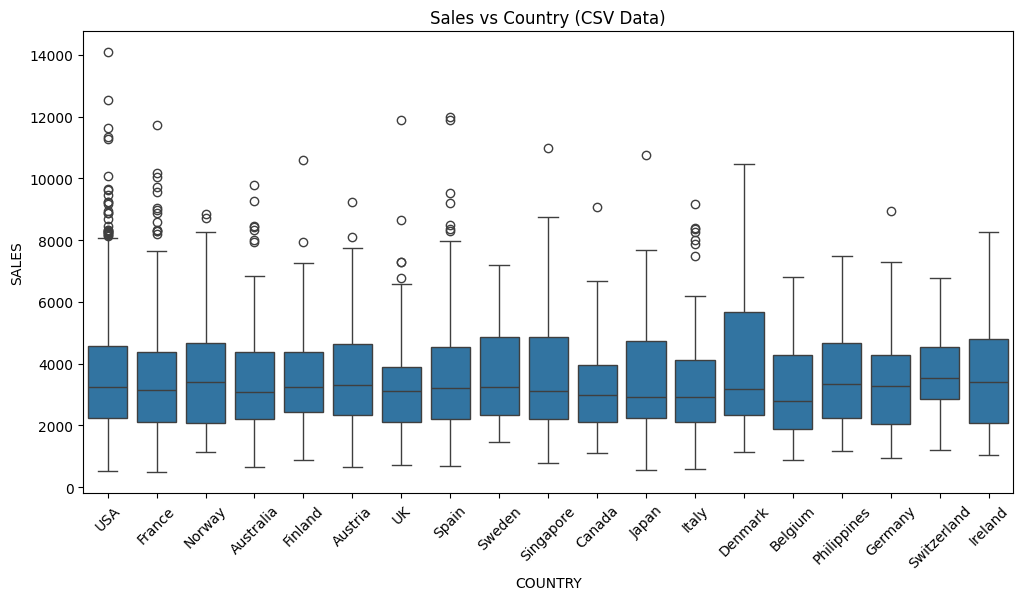

In [17]:
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# CSV Data: Sales vs Quantity Ordered
plt.figure(figsize=(12, 6))
sns.boxplot(x='COUNTRY', y='SALES', data=csv_df)
plt.title('Sales vs Country (CSV Data)')
plt.xticks(rotation=45)
plt.show()

###Handling outliers

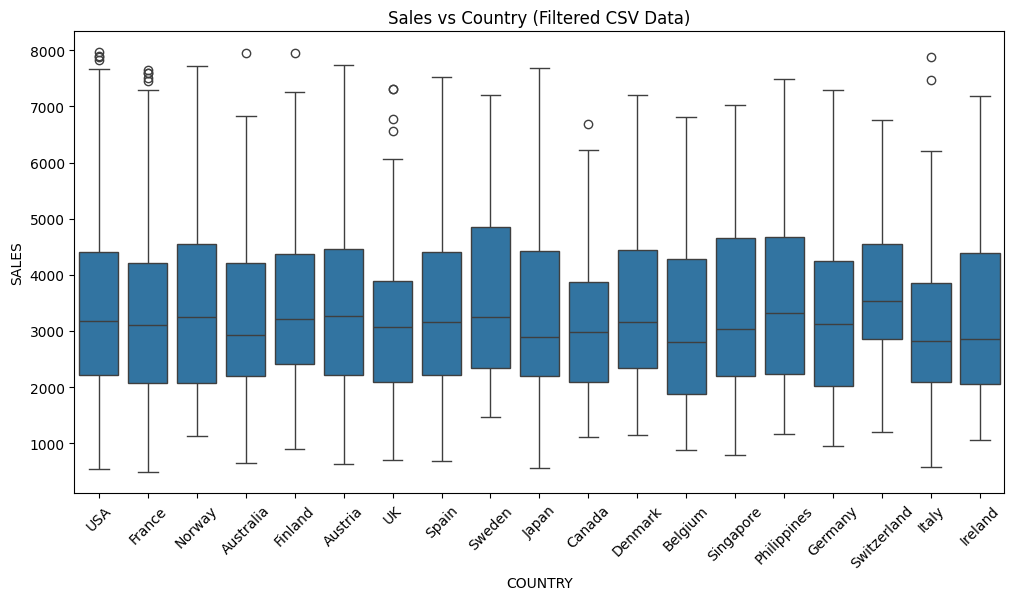

In [18]:
# Calculate IQR
Q1 = csv_df['SALES'].quantile(0.25)
Q3 = csv_df['SALES'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = csv_df[(csv_df['SALES'] >= lower_bound) & (csv_df['SALES'] <= upper_bound)]

# Create the boxplot with filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x='COUNTRY', y='SALES', data=filtered_df)
plt.title('Sales vs Country (Filtered CSV Data)')
plt.xticks(rotation=45)
plt.show()


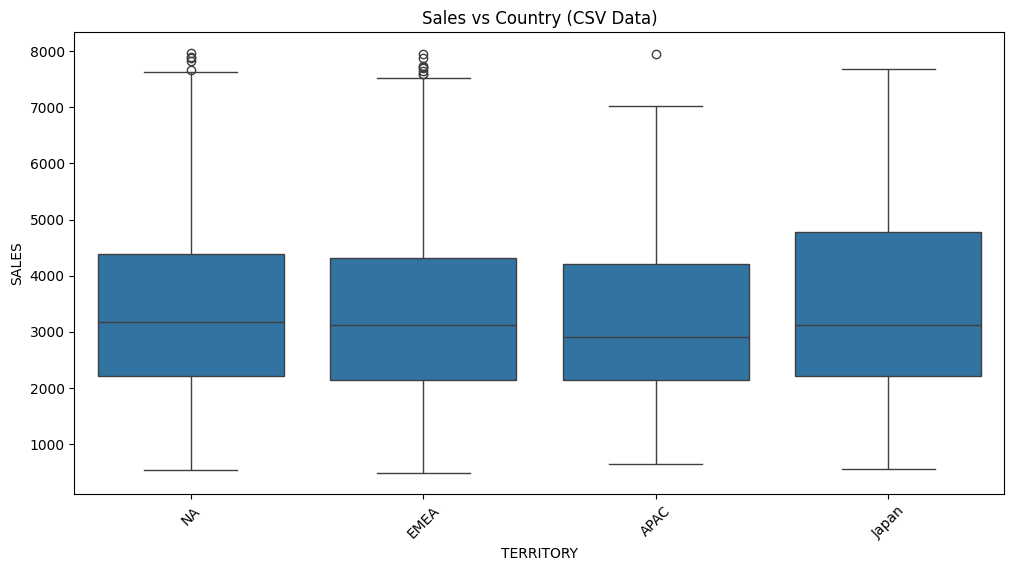

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='TERRITORY', y='SALES', data=filtered_df)
plt.title('Sales vs Country (CSV Data)')
plt.xticks(rotation=45)
plt.show()

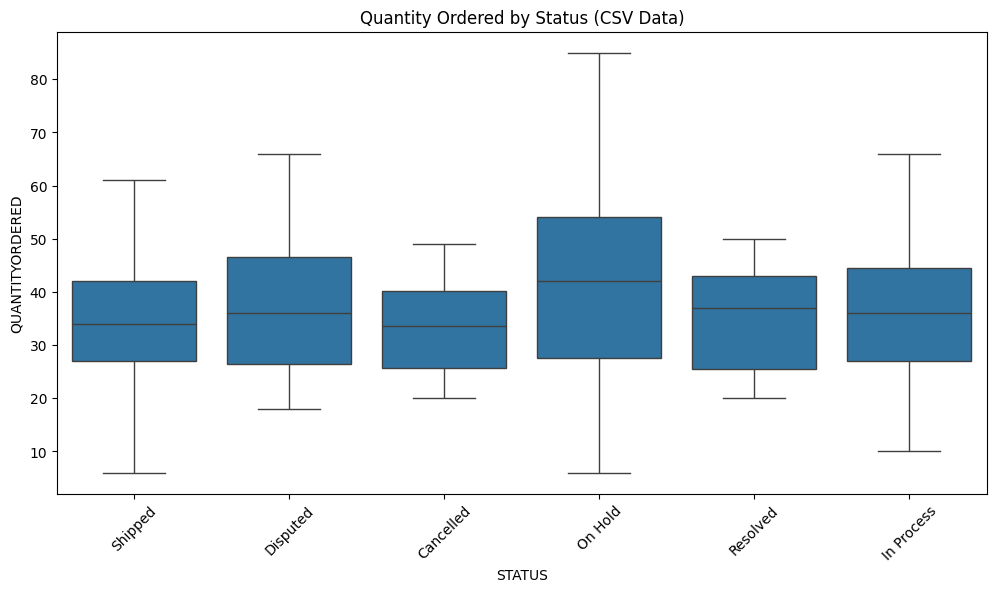

In [20]:
# CSV Data: Quantity Ordered by Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATUS', y='QUANTITYORDERED', data=filtered_df)
plt.title('Quantity Ordered by Status (CSV Data)')
plt.xticks(rotation=45)
plt.show()

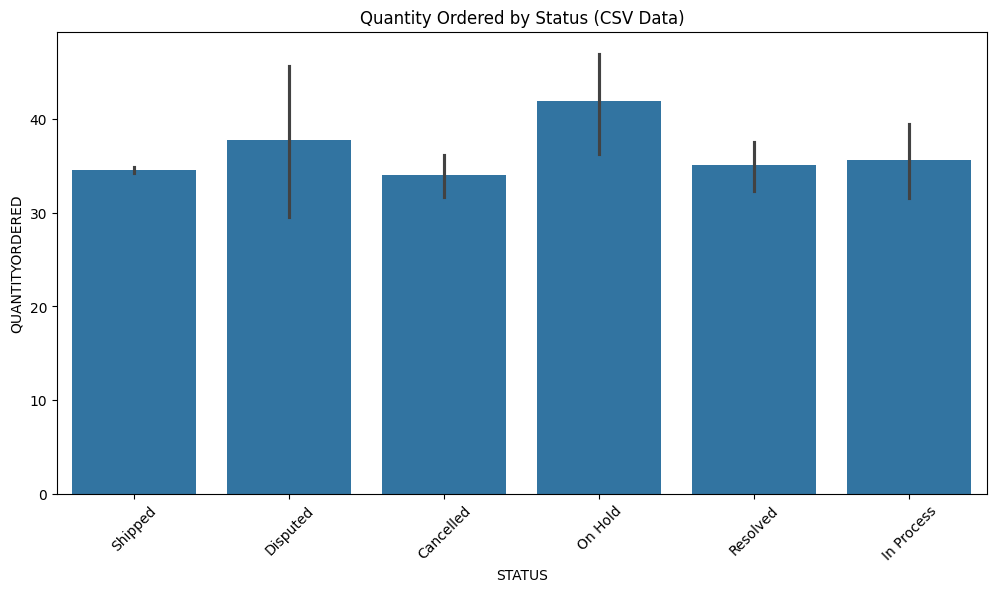

In [21]:
# Bar plot for Quantity Ordered by Status (for all datasets)
plt.figure(figsize=(12, 6))
sns.barplot(x='STATUS', y='QUANTITYORDERED', data=filtered_df)
plt.title('Quantity Ordered by Status (CSV Data)')
plt.xticks(rotation=45)
plt.show()

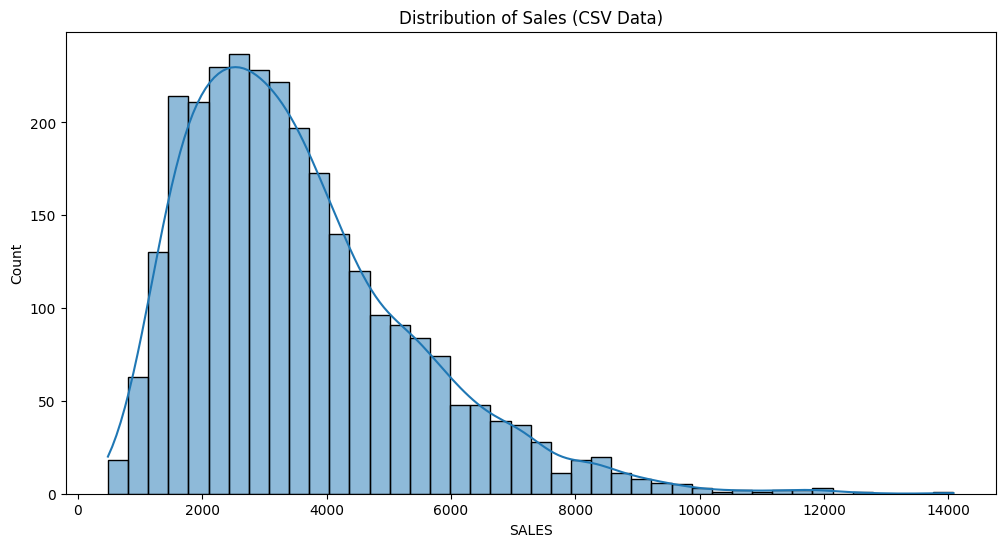

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(csv_df['SALES'], kde=True)
plt.title('Distribution of Sales (CSV Data)')
plt.show()

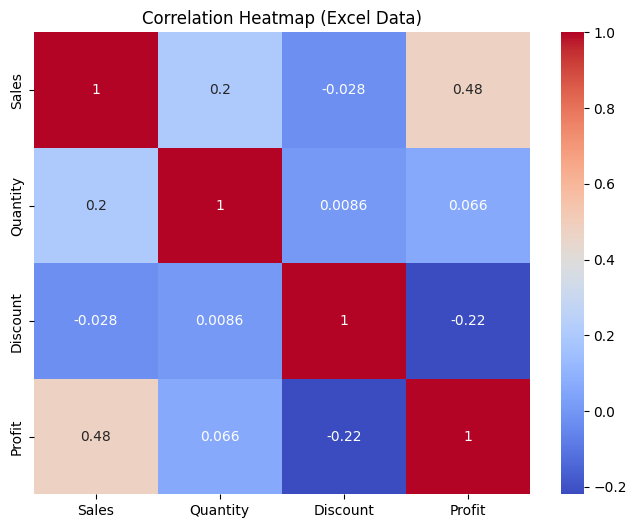

In [23]:
corr = excel_df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Excel Data)')
plt.show()


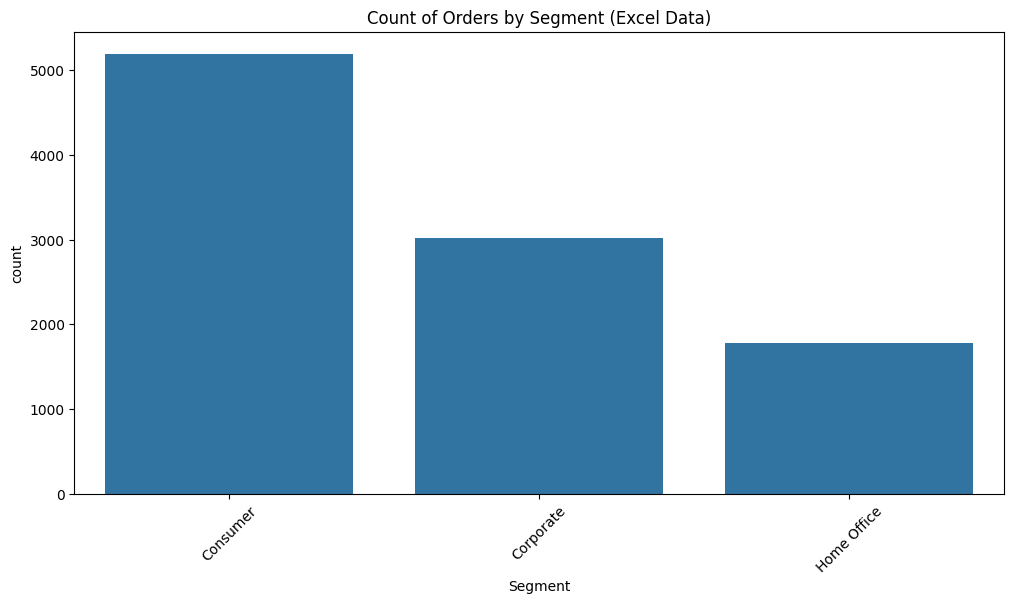

In [24]:
# Count plot for Status in Excel Data
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Segment in Excel Data
plt.figure(figsize=(12, 6))
sns.countplot(x='Segment', data=excel_df)
plt.title('Count of Orders by Segment (Excel Data)')
plt.xticks(rotation=45)
plt.show()


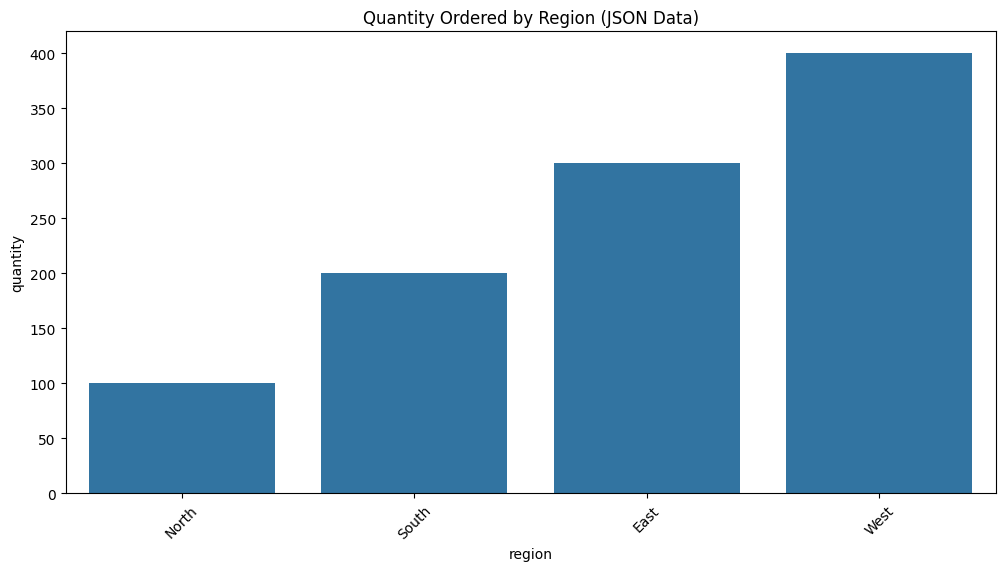

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Quantity Ordered by Region (JSON Data)
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='quantity', data=json_df)
plt.title('Quantity Ordered by Region (JSON Data)')
plt.xticks(rotation=45)
plt.show()


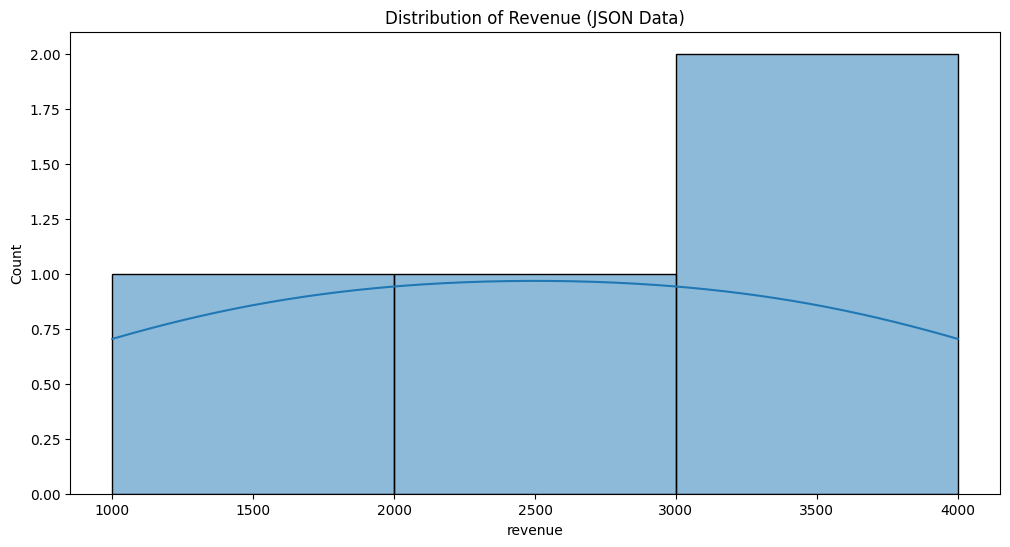

In [26]:
# Histogram for Sales in JSON Data
# Histogram for Distribution of Revenue (JSON Data)
plt.figure(figsize=(12, 6))
sns.histplot(json_df['revenue'], kde=True)
plt.title('Distribution of Revenue (JSON Data)')
plt.show()



In [27]:
# Convert Data to Unified Format
# Assuming all datasets have a "common column" for joining, e.g., 'ProductCode'
# For demonstration, we concatenate all data
print(f"Lets standardize column name before combining ")
csv_df.columns = csv_df.columns.str.lower()
excel_df.columns = excel_df.columns.str.lower()
json_df.columns = json_df.columns.str.lower()
print(f"\n CSV\n{csv_df.columns}\nEXCEL\n{excel_df.columns}\nJSON\n{json_df.columns}")
all_data = pd.concat([csv_df, excel_df, json_df], ignore_index=True, sort=False)


Lets standardize column name before combining 

 CSV
Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'city', 'country', 'territory', 'contactlastname',
       'contactfirstname', 'dealsize'],
      dtype='object')
EXCEL
Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')
JSON
Index(['region', 'salesperson', 'product', 'quantity', 'revenue'], dtype='object')


In [28]:
# Data Transformation
# Example: Creating new columns based on existing data
all_data['discounted_sales'] = all_data['sales'] * (1 - all_data.get('discount', 0))
all_data['total_quantity_sales'] = all_data.groupby('productline')['quantityordered'].transform('sum')

In [29]:
# Data Analysis
# Calculate summary statistics
total_sales = all_data['sales'].sum()
average_sales = all_data['sales'].mean()
productline_sales = all_data.groupby('productline')['sales'].sum()
print("\nTotal Sales:", total_sales)
print("Average Sales:", average_sales)
print("\nSales by Product Line:\n", productline_sales)


Total Sales: 12329829.7103
Average Sales: 961.9903027463525

Sales by Product Line:
 productline
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: sales, dtype: float64


In [30]:
# Summary statistics for all numerical columns in the data
print(all_data.describe())


        ordernumber  quantityordered    priceeach  orderlinenumber  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   
std       92.085478         9.741443    20.174277         4.225841   

              sales       qtr_id     month_id     year_id         msrp  \
count  12817.000000  2823.000000  2823.000000  2823.00000  2823.000000   
mean     961.990303     2.717676     7.092455  2003.81509   100.715551   
min        0.444000     1.000000     1.000000  2003.00000    33.000000   
25%       23.880000     2.000000     4.000000  2003.00000    68.000000   

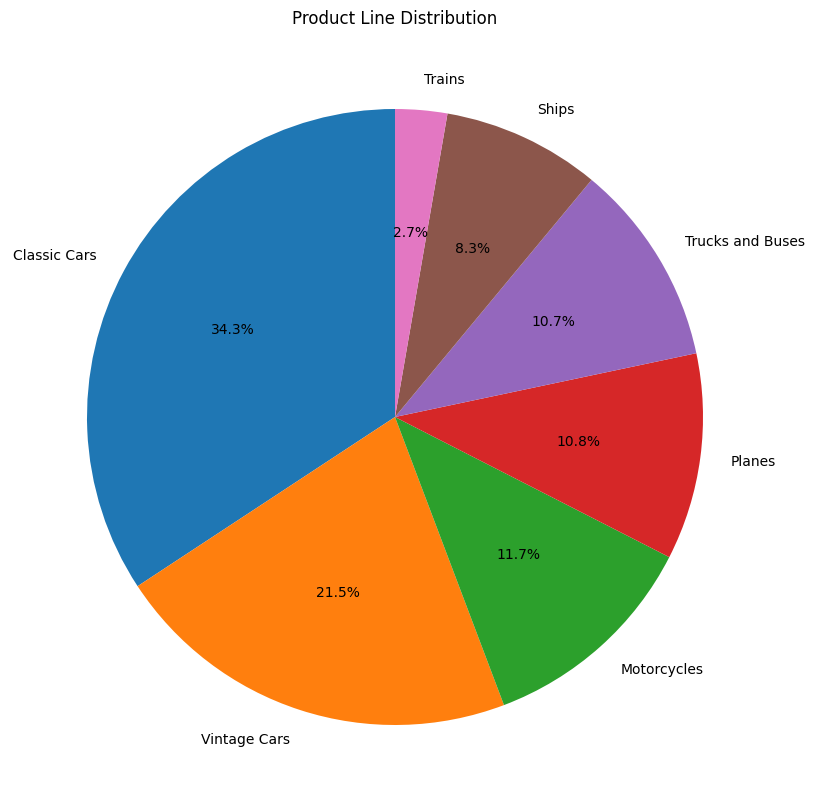

In [31]:
# Data Visualization
# 1. Pie chart for Product Line distribution
data_pie = all_data['productline'].value_counts().rename_axis('productline').reset_index(name='orders')
plt.figure(figsize=(10, 10))
plt.pie(data_pie.orders, labels=data_pie.productline, startangle=90, autopct='%.1f%%')
plt.title('Product Line Distribution')
plt.show()

In [32]:
# Summary
print("\nSummary of Key Metrics:")
print("Total Sales: ", total_sales)
print("Max Sale: ", all_data['sales'].max())
print("Min Sale: ", all_data['sales'].min())
print("Average Sale per Product Line:\n", productline_sales)



Summary of Key Metrics:
Total Sales:  12329829.7103
Max Sale:  22638.48
Min Sale:  0.44399999999999995
Average Sale per Product Line:
 productline
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: sales, dtype: float64


In [35]:
#Steps:

1. import libraries
2. load datasets
3. check dataset shape, col, head
4. check null values
5. check % null vales
6. drop duplicates
7. drop unwanted columns
8. fill wanted column (territory using mapping)
9. dropna
10. check shape of data
11. Calculate Unique of categorical variables like country
12. Plot individual :

    a. Box Plot - csv - sales vs country

    b. Remove outlier plot box plot - filtered_df - sales vs country

    c. box plot - status vs quantityordered - filtered_df

    d. bar plot - status vs quantityordered - filtered df

    e. histplot - sales - csv_df

    f. Count plot - segment - excel_df

    g. correlation heatmap - excel_df['Sales','Quantity','Discount','Predict']

    h. box plot - quantity vs region json_df

    i. histplot - revenue - json

13. standardize all columns of all df to lowercase for merging
14. concatenate all cols
15. create new cols : discounted_sales , total quantity sales
16. computational analytics on data - total-sales, avg-sales, productline-sales, data.describe()
17. Visualization using all_data
18. summary of all_data
